In [1]:
import numpy as np
import sympy
sympy.init_printing()
from scipy.optimize import brentq, newton, minimize_scalar
from scipy.integrate import solve_ivp, solve_bvp
from scipy.special import erf
import matplotlib.pyplot as plt

In [3]:
eta, V = sympy.symbols('eta, V')
kappa = sympy.symbols('kappa', positive=True)
u = sympy.Function('u')
tau = 1
eq2 = sympy.Eq(u(eta).diff(eta,2), - 1 / (2 * kappa) * (eta + sympy.sqrt(tau) * (V - u(eta))) * u(eta).diff(eta))

In [6]:
kappa = 0.1
tau = 1
V = 0
def f_bvp(eta, q):
    u, du = q
    f = np.zeros_like(q)
    f[0, :] = du
    f[1, :] = -1 / (2 * kappa) * (eta + np.sqrt(tau) * (V - u)) * du
    return f
def bcs(qa, qb):
    return np.array([qa[0] - 1, qb[0] + 1])

In [7]:
eta = np.linspace(-100, 100)
q_guess = np.zeros((2, len(eta)))
q_guess[0, :] = - eta / 100
q_guess[1, :] = - 1 / 100

In [8]:
soln = solve_bvp(f_bvp, bcs, eta, q_guess)
soln.success

True

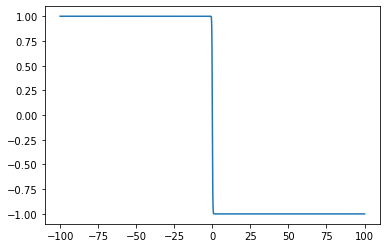

In [9]:
plt.plot(soln.x, soln.y[0, :])

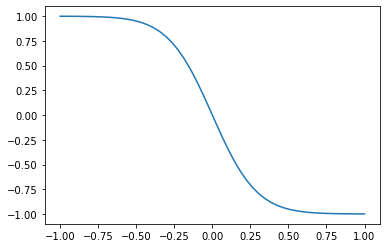

In [10]:
eta_zoom = np.linspace(-1, 1)
plt.plot(eta_zoom, soln.sol(eta_zoom)[0, :])